In [3]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv("Data/Admission_Predict.csv")

In [6]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.shape

(400, 9)

In [9]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [14]:
df.drop(columns=['Serial No.'],inplace=True)

In [15]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [19]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=1)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
import tensorflow
from  tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [37]:
model = Sequential()


#hidden Layer
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation="relu"))
#output layer 
model.add(Dense(1,activation="linear"))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss="mean_squared_error",optimizer="Adam")


In [44]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1165 - val_loss: 0.1126
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0819 - val_loss: 0.0787
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0557 - val_loss: 0.0555
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0390 - val_loss: 0.0403
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0291 - val_loss: 0.0316
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0235 - val_loss: 0.0274
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0214 - val_loss: 0.0253
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0205 - val_loss: 0.0243
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.0237
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0196 - val_loss: 0.0232
Epoch 11/100
8/8 [========

8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0052
Epoch 85/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 86/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 87/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 88/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 89/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 90/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 91/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 92/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 93/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 94/100
8/8 [===========

In [45]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 0s/step


In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test,y_pred)

0.8055329628111259

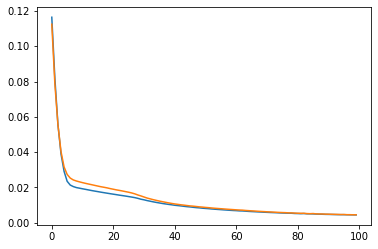

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])